In [32]:

import pandas as pd
import numpy as np
import seaborn as sns

In [33]:

df = pd.read_csv('heartdisease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
 chart=df.select_dtypes(include=['float64','int64'])


<Figure size 1440x720 with 0 Axes>

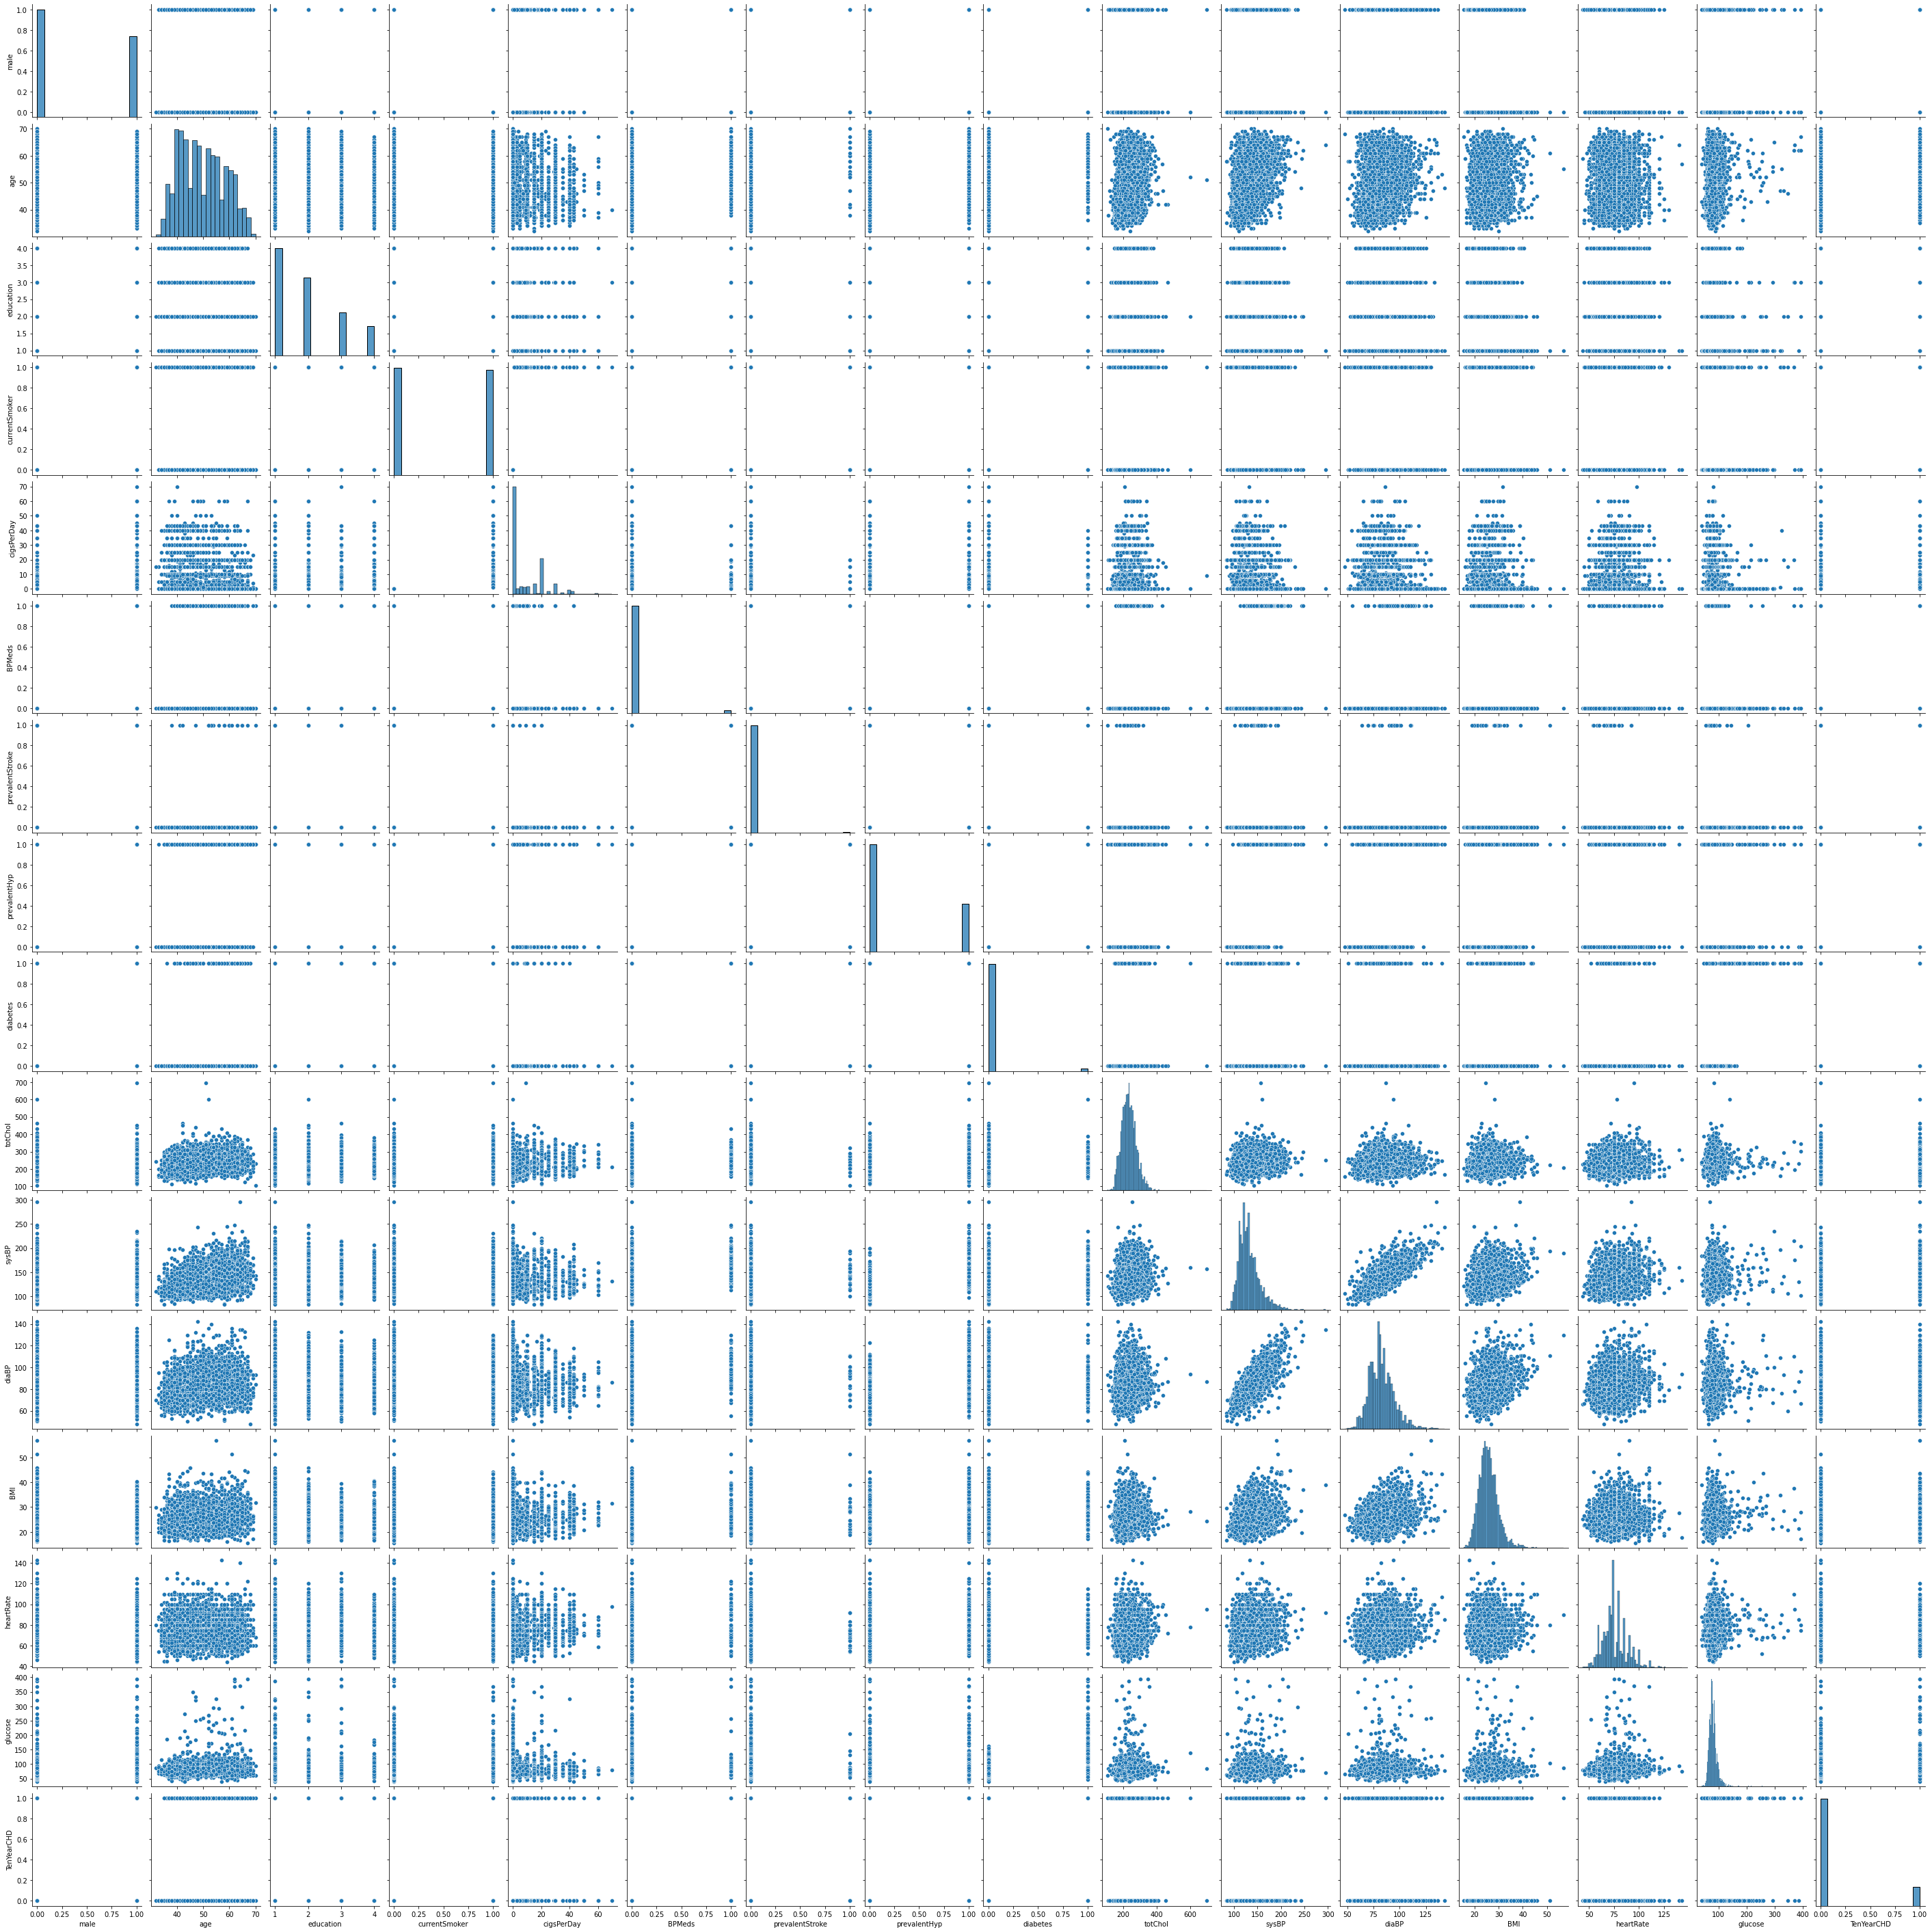

In [36]:
plt.figure(figsize=(20, 10))
sns.pairplot(chart)

<AxesSubplot:>

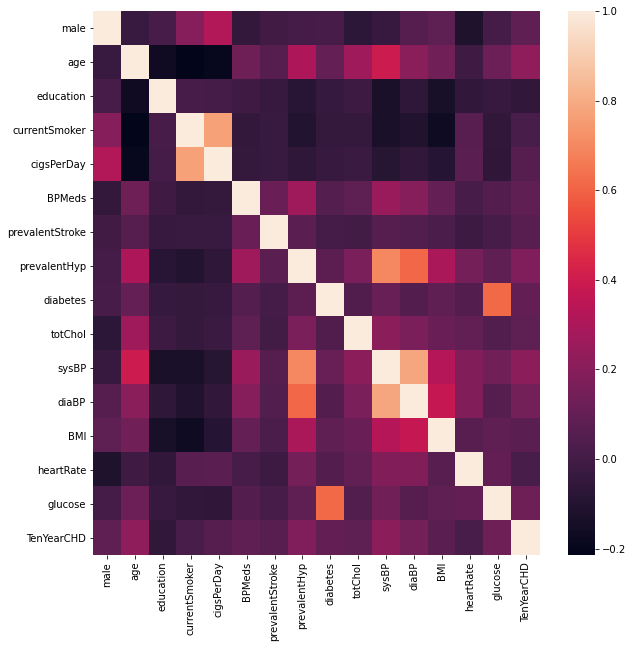

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

In [9]:
X=df

In [10]:
theta = [0.5]*len(X.columns)
theta


[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5]

In [11]:
y= df["TenYearCHD"]


In [12]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001


In [13]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [14]:

def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta

In [15]:
L, theta = gradient_descent(X, y, theta, 0.03, 2)


<ipython-input-12-93c18ad12c8f>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(z))) - 0.0000001
<ipython-input-13-c628e63b1d36>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [16]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [17]:
predict(X, y, theta, 0.03, 3)


<ipython-input-12-93c18ad12c8f>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(z))) - 0.0000001
<ipython-input-13-c628e63b1d36>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


([-0.0, -0.0, -0.0, -0.0], 0.8480415290231241)

In [18]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.01, 20000)


<ipython-input-12-93c18ad12c8f>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(z))) - 0.0000001
<ipython-input-13-c628e63b1d36>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [19]:
acc

0.5427088249174139

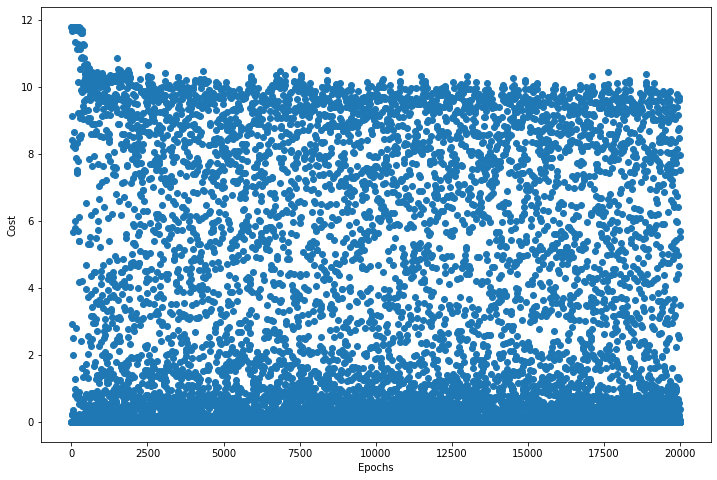

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [22]:
for i in J:
    if i>1:
     print ("RISKY")
    else:
     print ("SAFE")

RISKY
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
RISKY
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAFE
SAFE
RISKY
SAFE
SAFE
SAFE
SAF